In [1]:
import numpy as np
import os
import pandas as pd
import tensorflow as tf
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from util import*
from tensorflow.keras import layers, Model


In [2]:
# Call to use GPU later maybe

In [3]:
# Specify the path to download data
download_path = os.getcwd() + "/dataset/"
print(download_path)

/Users/zhenglyu/Desktop/Research/course/cme216/course_project/cme-216-housing-pricing-prediction/dataset/


In [4]:
ds = download_skl_dataset(download_path)

In [5]:
data, target, feature_names, DESCR = data_process(ds)

In [6]:
data_norm, std_data, mean_data = feature_normalization(data, log_flag=True)

In [7]:
# Split data to training, validation and testset
x_train, y_train, x_val, y_val, x_test, y_test = train_set_prepare(data_norm, target, random_state=100)

In [8]:
# Create the model class
model = nn_model(data, target)

# Build model
model.build_model()

# Compile model
# model.compile_model(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-4),
#                     loss = tf.keras.losses.MeanAbsolutePercentageError(),
#                     metrics = [tf.keras.metrics.MeanAbsolutePercentageError()])

model.compile_model(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-4))

In [9]:
# Train the model
model.train(x_train, y_train, x_val, y_val, batch_size=10, epochs=10)

NameError: name 'y_train' is not defined

In [60]:
y_pred = model.test(x_test, y_test)

## Visualize the result

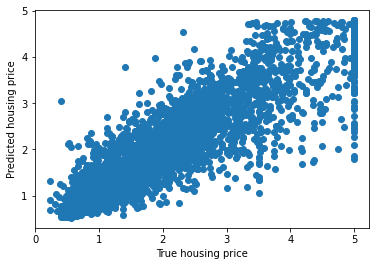

In [61]:
plot_pred_true(x_test, y_test, y_pred)

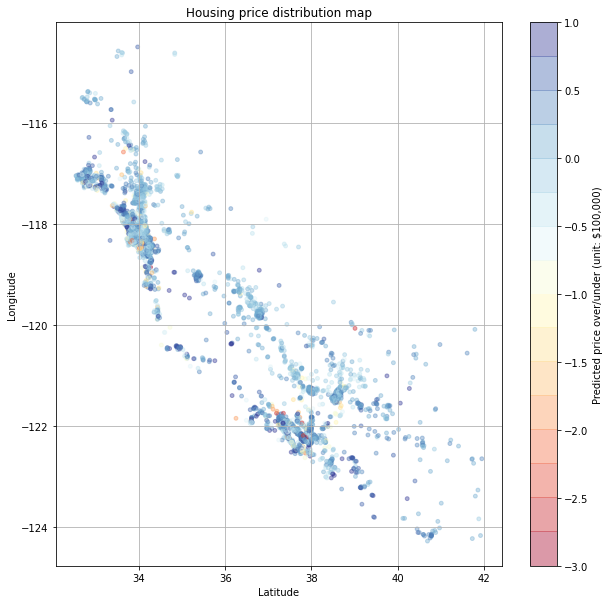

In [63]:
# Plot land map
land_map(x_test*std_data + mean_data, (y_pred.T - y_test), bar_label='Predicted price over/under (unit: $100,000)', clim=[-3, 1], step=16)